# T001 · Scaffold-Based data split
Authors:

- Vahid Atabaigielmi, CADD seminar 2023, Universität des Saarlandes (UdS)
- Michael Bockenköhler, 2023, Volkamer lab, Universität des Saarlandes (UdS)
- Andrea Volkamer, 2023, Volkamer lab, Universität des Saarlandes (UdS)

## Aim of this talktorial

The aim of this talktorial is to to experiment with different scaffold_based splitting strategies and evaluate the performance of the feed forward neural network model on  test sets to determine the most appropriate splitting approach.

### Contents in *Theory*
* Data leakage
* Molecular scaffold definition
* Data spliting methods
> * Random based spliting
> * Similarity-based Cold-Single Split
> * Identity-based Cold-Single Split
* Model

### Contents in *Practical*

_Add Table of Contents (TOC) for Practical section._
* Import the Data
* Visualisation of different Molecular Scaffolds
* Random split
* Similarity-based Cold-Single Split
* Identity-based Cold-Single Split
* Plot trainng and test sets
* Preprocessing data
* Model
* Traning
* Evaluation

### References


* <i>Journal of cheminformatics</i> (2021), <b>13(1)</b>, 1-14 (https://doi.org/10.1186/s13321-021-00576-2)
* <i>pharmacometrics & systems pharmacology</i> (2020), <b>9(3</b>, 129-142 (https://doi.org/10.1002/psp4.12491)
* <i>Journal of medicinal chemistry</i> (1996), <b>39(15)</b>, 2887-2893 (https://doi.org/10.1021/jm9602928)
* <i>Molecular informatics</i> (2011), <b>30(8)</b>, 646-664 (https://doi.org/10.1002/minf.201100078)
* **Talktorial T004** [https://github.com/volkamerlab/teachopencadd/tree/master/teachopencadd/talktorials]
* **Talktorial T037** [https://github.com/volkamerlab/teachopencadd/tree/master/teachopencadd/talktorials]
* dataSAIL Document [https://datasail.readthedocs.io/en/latest/index.html]
* [https://github.com/kalininalab/DataSAIL/blob/main/docs/index.rst]
* Quantum Machines 9(QM9) web services: [<i>J. Chem. Inf. Model.</i> (2012), <b>52</b>, 2864–2875](http://quantum-machine.org/datasets/) 

## Theory

### Data leakage
**Data leakage** is a critical error that often occurs during the development of machine learning models. Data leakage occurs when the information being predicted in a machine learning algorithm is coincidentally present in the data used for training. This leakage of data can have several negative consequences, such as diminishing the model's ability to generalize (overfitting), overestimating the model's performance, or rendering the model entirely invalid.
To avoid data leakage, it is essential to perform data preparation tasks like normalizing variables, engineering features or clustring the data based on their similarety before spliting  it into training and test sets. The most straightforward approach for splitting data is a random split, however this is not ideal for structure-activity models. The **series effect**, also known as the series bias or series-dependent bias, refers to a phenomenon commonly observed in **quantitative structure-activity relationship (QSAR) modeling**. It occurs because QSAR models tend to learn and exploit the common structural scaffold patterns within the training data. When the test data contains compounds that are structurally similar to the training compounds, the model may perform well due to the presence of shared descriptors and structural features. However, when the model encounters compounds from different chemical series in real-world applications, it may fail to accurately predict their activities or properties because it hasn't learned the relevant patterns for those series.

In another word, in QSAR modeling the goal is to understand a **causality** between the structural features of chemical compounds and their corresponding activity or property. However, if the data used for training and testing the model predominantly consist of compounds from a few closely related chemical series, the model may infer a **correlation** based on the structural similarities rather than truly understanding the underlying **causal relationship**.

To mitigate the series effect and evaluate the generalizability of a QSAR model, it is important to carefully split the training and testing data sets. One suggested method, as mentioned is **clustring** the data according to their similarities and subsequently dividing the clusters into training and test sets. Nevertheless, this approach carries a disadvantage: it can no longer ensure a expected split ratio between the training and test sets. However recently a package for python has been develpoed to address this probelm. **DataSAIL** is a tool designed to partition data in a manner that minimizes information leakage. This tool approaches dataset splitting as a constrained minimization problem, where it determines the assignment of data points to different partitions by minimizing an objective function that considers the amount of information leakage.
The aim of this talktorial is to to experiment with different scaffold_based splitting strategies available in Datasail and evaluate the performance of the feed forward neural network model on  test sets to determine the most appropriate splitting approach. DataSAIL utilizes disciplined quasi-convex programming and binary quadratic programs as its framework for expressing the optimization objective. When it comes to solving such problems, Datasail relies on SCIP, a swift non-commercial solver, as well as MOSEK, a commercial solver that offers complimentary licenses for academic purposes.

### Molecular Scaffold definition
**A molecular scaffold** refers to the core structure of a molecule, which is composed of its **ring systems**, **linkers**, and **exocyclic double bonds**. It is obtained by removing all terminal side chains from the molecule, while retaining any double bonds that exist in the structure.
The concept of a molecular scaffold is particularly relevant in the study of cyclic molecules, where the focus is on the central ring system and its connectivity with other components. By simplifying the structure to its sacffold, researchers can analyze and compare the underlying **core structure of different molecules**, which can provide insights into their chemical properties and reactivity.
It's important to note that the molecular scaffold does not consider the specific substituents or functional groups attached to the rings or linkers. Instead, it provides a simplified representation of the cyclic structure, highlighting its fundamental connectivity and double bond arrangement. A **generic molecular scaffold**, also known as a **generic scaffold**, refers to the structure of a molecule where all heteroatoms (atoms other than carbon) are substituted by carbon atoms.


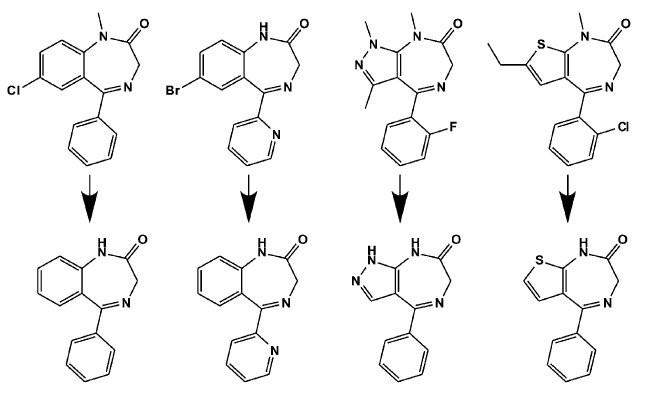

*Figure 1:* 
Murcko Scaffold: [Bemis, G. W., & Murcko, M. A. (1996). The properties of known drugs. 1. Molecular frameworks. Journal of medicinal chemistry, 39(15), 2887-2893.](https://academic.oup.com/nar/article/43/W1/W612/2467881). 

### Datasail's spliting methods


#### Random-based splitting
This is a simple and commonly used method where the data is randomly divided into subsets. The random splitting can be performed in various ways, such as random assignment of samples to different subsets or randomly shuffling the entire dataset and then dividing it into subsets.

#### Similarity-based Cold-Single Split (CCSe)
The process involves dividing a dataset into separate groups or clusters based on the scaffold similarity of the molecules. This division is done to minimize the sharing of information between the different clusters. The aim is to ensure that the same molecule is not present in more than one cluster 

#### Identity-based Cold-Single Split (ICSe)
The dataset is divided into separate splits based on the IDs assigned to each data point. This approach guarantees that every data point is assigned to exactly one split, avoiding any duplication or omission. This becomes particularly advantageous when combined with the weighting of the data points.

When weights are assigned to the data points, the splits can be optimized to achieve the desired sizes while considering these weights. This optimization process takes into account the relative importance or significance of each data point, as determined by its weight. By incorporating the weights, the splits can be tailored to meet specific requirements regarding the sizes of the resulting subsets while ensuring that the distribution of important data points is appropriately represented in each split.

In summary, splitting the dataset based on data point IDs ensures that every data point appears in only one split, and when combined with weighting, it allows for fine-tuning the splits to meet size requirements while considering the importance of each data point.

### Model
The feed-forward neural network utilized in this tutorial originates from **Talktorial T037**.

## Practical

### Import all the necessary libraries

In [1]:
import numpy as np
import csv
import math
import pandas as pd
from pathlib import Path
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from rdkit import Chem
from rdkit.Chem import AllChem, Draw
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tabulate import tabulate
from rdkit.Chem.Scaffolds import MurckoScaffold
from rdkit.Chem.Scaffolds.MurckoScaffold import MakeScaffoldGeneric

In [2]:
# Set path to this notebook
HERE = Path(_dh[-1])
DATA = HERE / "qm9_5000.tsv"

### Import QM9 data

In this talktorial we use QM9 dataset from the MoleculeNet paper. This dataset consists of about 130,000 molecules together with their quantum chemical properties. We will build a model predicting R2 based on the string representation of the molecule provided in the smiles column in the table below .In the QM9 dataset, the property R2 refers to the molecular electronic spatial extent, also known as the mean square distance of the electrons from the atomic nuclei. It is one of the quantum mechanical properties calculated for each molecule in the dataset. The R2 property provides information about the spatial distribution of the electrons in a molecule, giving an indication of the size or extent of the electron cloud around the atoms. It is quantified by calculating the average squared distance between the electrons and the nuclei within the molecule.

**Responce variable**: smile string

**Target**: r2

In [3]:
data = pd.read_csv("qm9_5000.tsv",sep='\t')
data.head()

,mol_id,smiles,r2
0,gdb_66703,O=C1[C@H]2[C@@H]3[N@H+]2[C@@H]2[C@H]1[C@]32O,882.3655
1,gdb_26191,C[C@@H](O)c1cc(N)c[nH]1,1397.2819
2,gdb_51408,O=CO[C@@H]1[C@@H]2N[C@H]1C2=O,1213.2519
3,gdb_61444,CC(=O)C[C@@H](O)[C@H]1CO1,1448.5037
4,gdb_90638,C[C@H]1N[C@H]2[C@@H]1[C@]2(N)C#N,1226.4068


### Visualisation of different Molecular Scaffolds

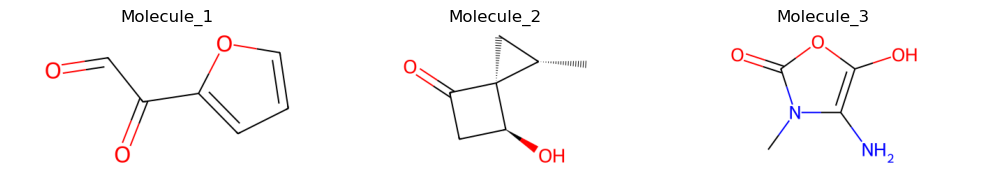

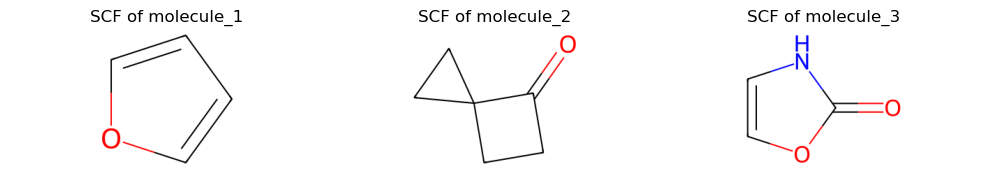

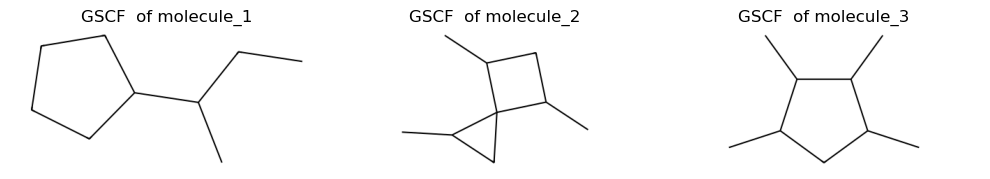

CCC(C)C1CCCC1     	       		       	CC1CC(C)C12CC2C     	       		       	CC1CC(C)C(C)C1C


In [4]:

a=40
b=43
Molecule = data['smiles'][a:b].apply(Chem.MolFromSmiles)
Scaffold_smile = Molecule.apply(lambda mol: Chem.MolToSmiles(MurckoScaffold.GetScaffoldForMol(mol)))
Scaffold_mol= Scaffold_smile.apply(lambda smile: Chem.MolFromSmiles(smile))
ScaffoldGeneric= [MakeScaffoldGeneric(mol) for mol in Molecule]
ScaffoldGeneric_mol = [Chem.MolFromSmiles(Chem.MolToSmiles(x)) for x in ScaffoldGeneric]
def draw_smiles(mols, SCF):
    
    legends = [f'{SCF}_{i+1}'.format(i+1) for i in range(len(mols))]
    images = []
    for mol in mols:
        img = Draw.MolToImage(mol, size=(450, 200))
        images.append(img)
    return images, legends

def display_images_in_rows(images, legends):
    num_images = len(images)
    cols = 3
    rows = math.ceil(num_images / cols)
    fig, axes = plt.subplots(rows, cols, figsize=(10, rows * 3))
    axes = axes.ravel()
    for i, (img, legend) in enumerate(zip(images, legends)):
        if i < num_images:  # Only display images if available
            axes[i].imshow(img)
            axes[i].axis('off')
            axes[i].set_title(legend)
        else:  # Remove empty subplots
            fig.delaxes(axes[i])
    plt.tight_layout()
    plt.show()
molecule_images, molecule_legends = draw_smiles(Molecule,'Molecule')
scaffold_images, scaffold_legends = draw_smiles(Scaffold_mol,'SCF of molecule')
scaffold_generic_images, scaffold_generic_legends = draw_smiles(ScaffoldGeneric_mol,'GSCF  of molecule')

display_images_in_rows(molecule_images, molecule_legends)
display_images_in_rows(scaffold_images, scaffold_legends)
display_images_in_rows(scaffold_generic_images, scaffold_generic_legends)


ScaffoldGeneric_smile = [Chem.MolToSmiles(mol) for mol in ScaffoldGeneric_mol]
print('     \t       \t\t       \t'.join(ScaffoldGeneric_smile))

### Generate fingerprints

This code takes a column of SMILES strings, converts them into RDKit molecules, generates Morgan fingerprints for each molecule, and adds the fingerprints as a new column in the 'data' DataFrame.

In [5]:
smiles = data['smiles'].values
target = data['r2'].values
fingerprints = []
fingerprint_width = 2048
for sm in smiles:
    mol = Chem.MolFromSmiles(sm)
    fingerprint = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=fingerprint_width)
    fingerprints.append(fingerprint)
data['fingerprints']=fingerprints

### Random split

These steps prepare the fingerprints and target values as PyTorch tensors, which are commonly used in deep learning models. The training and testing data are split, and the resulting tensors can be used for further model training and evaluation.

In [6]:
fingerprints = np.array(fingerprints, dtype=np.float32)

fingerprints_train, fingerprints_test, target_train, target_test = train_test_split(fingerprints, target, test_size=0.2, random_state=42)

fingerprints_train_RAND = torch.from_numpy(np.array(list(fingerprints_train),dtype=np.float32)).float()
fingerprints_test_RAND = torch.from_numpy(np.array(list(fingerprints_test),dtype=np.float32)).float()
target_train_RAND = torch.from_numpy(target_train).float().view(-1, 1)
target_test_RAND = torch.from_numpy(target_test).float().view(-1, 1)


### Similarity-based Cold-Single Split (CCSe)
This method splits the data based on the similarity of smiles structure, ensuring that each split contains similar smiles structure. To use this method, provide a similarity measure for smiles using the `--e-sim` option.

`--e-sim ecfp`: an abbreviated term for the 3-step approach, facilitates the identification of clusters within a dataset containing chemical molecules. Initially, the process involves generating Scaffolds by implementing RDKits MakeScaffoldGeneric. This step simplifies molecules by substituting each heavy atom with a carbon atom and every bond with a single bond. Subsequently, a 1024-bit Morgan fingerprint with a radius of 2 is calculated in the second step. Finally, DataSAIL determines the similarity between these fingerprints using Tanimoto-Similarities based on the bit-vectors.for further informations about Morgan fingerprint and Tanimoto-Similaritiy please check Tutorial T004.

`--solver SCIP`: This argument specifies the solver to be used for solving any optimization problems that may arise during the data splitting process.
After executing the command, the split data will be saved in the specified directory. We have already completed this step and stored the data. In the subsequent step, we will import the saved data for further preprocessing. this command is instructing the Datasail tool to perform data splitting on the molecule data using the CCSe technique, with an 80:20 split ratio for training and testing. 

In [7]:
#!datasail --e-type M --e-data output2500.tsv --e-sim ecfp --output PycharmProjects/CADDSeminar_2023/notebooks/T001_Scaffold-based-data-split/ --technique CCSe --splits 0.8 0.2 solver SCIP

In summary, the provided code reads two files that are the outputs of performing data split using the CCSe method.
`cluster_CCSe` DataFrame:`....._CCSe_SCIP_clusters.tsv`
This file contains information about which CHMBL_ID belongs to which cluster after performing the CCSe method for data splitting.
split_CCSe DataFrame:`....._CCSe_SCIP_splits.tsv`
This file contains information that indicates which `mol_id` belongs to the training and test sets after applying CCSe data splitting.

In [8]:
cluster_CCSe=pd.read_csv('qm9_5000_CCSe_clusters.tsv', sep='\t')
split_CCSe=pd.read_csv('qm9_5000_CCSe_splits.tsv', sep='\t')
cluster_CCSe.rename(columns={'ID': 'mol_id'},inplace=True)

train_CCSe_id=split_CCSe[split_CCSe['Split'].isin(['Split000'])].rename(columns={'ID': 'mol_id'})
test_CCSe_id=split_CCSe[split_CCSe['Split'].isin(['Split001'])].rename(columns={'ID': 'mol_id'})

train_CCSe_t=data[data['mol_id'].isin(train_CCSe_id['mol_id'])]
test_CCSe_t=data[data['mol_id'].isin(test_CCSe_id['mol_id'])]

train_CCSe = pd.merge(train_CCSe_t, cluster_CCSe, on='mol_id')
test_CCSe = pd.merge(test_CCSe_t, cluster_CCSe, on='mol_id')

fingerprints_train_CCSe = torch.from_numpy(np.array(list(train_CCSe['fingerprints']),dtype=np.float32)).float()
fingerprints_test_CCSe = torch.from_numpy(np.array(list(test_CCSe['fingerprints']),dtype=np.float32)).float()
target_train_CCSe = torch.from_numpy(np.array(train_CCSe['r2'])).float().view(-1, 1)
target_test_CCSe = torch.from_numpy(np.array(test_CCSe['r2'])).float().view(-1, 1)

### Identity-based Cold-Single Split (ICSe)
Identity-based Cold-Single Split (ICSe): This method splits the data based on the identity of canonical_smiles, ensuring that each split contains unique canonical_smiles values.

In [9]:
#!datasail --e-type M --e-data output2500.tsv --e-sim ecfp --output PycharmProjects/CADDSeminar_2023/notebooks/T001_Scaffold-based-data-split/ --technique ICSe --splits 0.8 0.2 solver SCIP

This line reads the split information from the specified TSV file (input8824_ICSe_SCIP_splits.tsv) into a pandas DataFrame called split_ICSe.

In [10]:
split_ICSe=pd.read_csv('qm9_5000_ICSe_splits.tsv', sep='\t')

The following code selects rows from the split_ICSe DataFrame based on the value in the 'Split' column. Specifically, it selects rows where the 'Split' column has the label 'Split000' for the training set and 'Split001' for the test set. Therefore, by utilizing the information in the 'Split' column, we can separate the 'molecule_chembl_id' of the training and test sets.

In [11]:
train_ICSe_id=split_ICSe[split_ICSe['Split'].isin(['Split000'])].rename(columns={'ID': 'mol_id'})
test_ICSe_id=split_ICSe[split_ICSe['Split'].isin(['Split001'])].rename(columns={'ID': 'mol_id'})

train_ICSe = pd.merge(train_ICSe_id, data, on='mol_id')
test_ICSe = pd.merge(test_ICSe_id, data, on='mol_id')
fingerprints_train_ICSe = torch.from_numpy(np.array(list(train_ICSe['fingerprints']),dtype=np.float32)).float()
fingerprints_test_ICSe = torch.from_numpy(np.array(list(test_ICSe['fingerprints']),dtype=np.float32)).float()
target_train_ICSe = torch.from_numpy(np.array(train_ICSe['r2'])).float().view(-1, 1)
target_test_ICSe = torch.from_numpy(np.array(test_ICSe['r2'])).float().view(-1, 1)

### Feed-forward neural network

 This code defines a simple FNN model with two fully connected layers (`fc1` and `fc2`). The input dimension, hidden dimension, and output dimension are specified when creating an instance of the FNN class.

In [12]:
class FNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

### Train the model
This code snippet performs the training and evaluation of a neural network model using the PyTorch library. We defined the loss function using Mean Squared Error (MSE) with `nn.MSELoss()` and used `Matplotlib` to create a figure with two subplots for training and test losses. we also initialized an Adam optimizer with `optim.Adam(model.parameters())`.

In [13]:
def training_models(fingerprints_train, fingerprints_test, target_train, target_test, split_method):
    """
    Train models using fingerprints_train and target_train, and evaluate the performance on fingerprints_test and target_test.

    @args:
    ------
    fingerprints_train : torch.Tensor
        Training fingerprints tensor.
    fingerprints_test : torch.Tensor
        Test fingerprints tensor.
    target_train : torch.Tensor
        Training target tensor.
    target_test : torch.Tensor
        Test target tensor.
    split_method : str
        Method used for splitting the dataset.

    @return:
    --------
    model : FNN
        Trained FNN model.
    criterion : nn.Module
        Loss function used for training.
    """
    global num_epochs
    num_epochs = 10
    batch_size = 32
    train_losses = []
    test_losses = []

    # Create a new instance of the model for each dataset
    model = FNN(fingerprint_width, 128, 1)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters())
    for epoch in range(num_epochs):
        indices = torch.randperm(fingerprints_train.size(0))
        fingerprints_train = fingerprints_train[indices]
        target_train = target_train[indices]
        epoch_loss = 0
        for i in range(0, fingerprints_train.size(0), batch_size):
            batch_fingerprints = fingerprints_train[i:i+batch_size]
            batch_target = target_train[i:i+batch_size]

            outputs = model(batch_fingerprints)

            loss = criterion(outputs, batch_target)
            epoch_loss += loss

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        train_losses.append(epoch_loss.item())
        with torch.no_grad():
            model.eval()
            test_outputs = model(fingerprints_test)
            test_loss = criterion(test_outputs, target_test)
            test_losses.append(test_loss.item())
            print(f'Epoch [{epoch+1}/{num_epochs}], Training loss: {epoch_loss.item()}, Test loss: {test_loss.item()}')

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    ax1.plot(train_losses, label='Training loss')
    ax1.set_title(f'{split_method} Training loss over epochs for dataset of size {len(fingerprints_train)+len(fingerprints_test)}')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()

    ax2.plot(test_losses, label='Test loss')
    ax2.set_title(f'{split_method} Test loss over epochs for dataset of size {len(fingerprints_train)+len(fingerprints_test)} ')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()

    plt.tight_layout()
    plt.savefig(f'loss_plot_{split_method}_{len(fingerprints_train)+len(fingerprints_test)}.png')  # Save the figure to a file
    plt.show()
    return model, criterion

Epoch [1/10], Training loss: 183990016.0, Test loss: 1449702.5
Epoch [2/10], Training loss: 161768224.0, Test loss: 1177973.5
Epoch [3/10], Training loss: 120420000.0, Test loss: 799430.375
Epoch [4/10], Training loss: 74320664.0, Test loss: 451908.75
Epoch [5/10], Training loss: 38731740.0, Test loss: 227170.90625
Epoch [6/10], Training loss: 19398574.0, Test loss: 125861.1875
Epoch [7/10], Training loss: 11955036.0, Test loss: 90815.46875
Epoch [8/10], Training loss: 9533916.0, Test loss: 78010.5234375
Epoch [9/10], Training loss: 8450686.0, Test loss: 70353.1796875
Epoch [10/10], Training loss: 7657335.0, Test loss: 64409.6796875


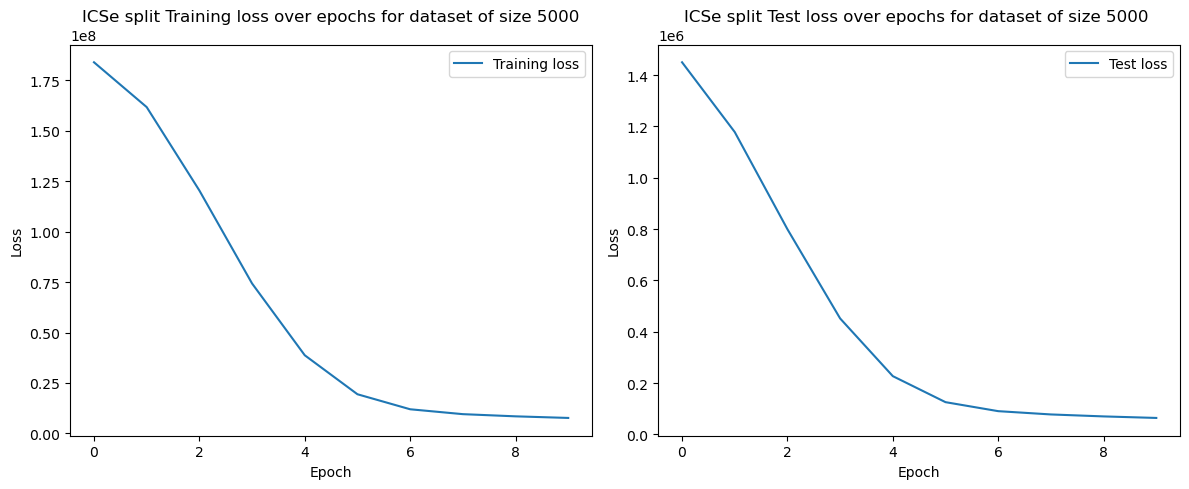

Epoch [1/10], Training loss: 184329728.0, Test loss: 1456665.375
Epoch [2/10], Training loss: 163751888.0, Test loss: 1202847.125
Epoch [3/10], Training loss: 124281760.0, Test loss: 841122.25
Epoch [4/10], Training loss: 79531080.0, Test loss: 499253.78125
Epoch [5/10], Training loss: 43605044.0, Test loss: 263672.25
Epoch [6/10], Training loss: 22463748.0, Test loss: 144764.828125
Epoch [7/10], Training loss: 13300750.0, Test loss: 98589.1015625
Epoch [8/10], Training loss: 10104938.0, Test loss: 81614.265625
Epoch [9/10], Training loss: 8808769.0, Test loss: 73014.9765625
Epoch [10/10], Training loss: 7978178.5, Test loss: 66954.296875


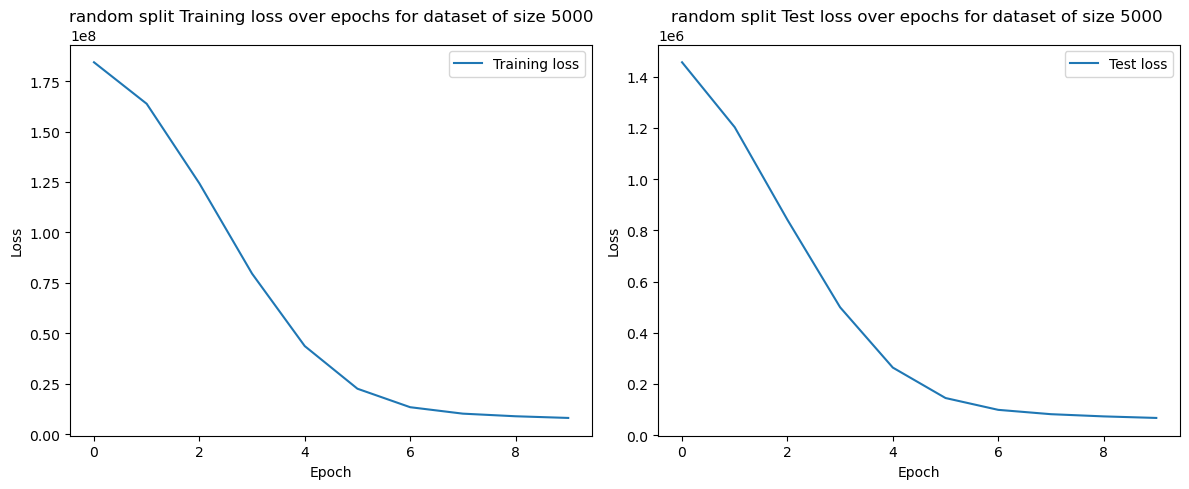

Epoch [1/10], Training loss: 190111088.0, Test loss: 1278883.875
Epoch [2/10], Training loss: 169275456.0, Test loss: 1037327.75
Epoch [3/10], Training loss: 128891992.0, Test loss: 698072.0
Epoch [4/10], Training loss: 82959936.0, Test loss: 381159.0
Epoch [5/10], Training loss: 45848760.0, Test loss: 171816.640625
Epoch [6/10], Training loss: 23952288.0, Test loss: 76376.6171875
Epoch [7/10], Training loss: 14392529.0, Test loss: 46337.34375
Epoch [8/10], Training loss: 10967163.0, Test loss: 39691.51171875
Epoch [9/10], Training loss: 9493243.0, Test loss: 37556.82421875
Epoch [10/10], Training loss: 8520258.0, Test loss: 35810.5078125


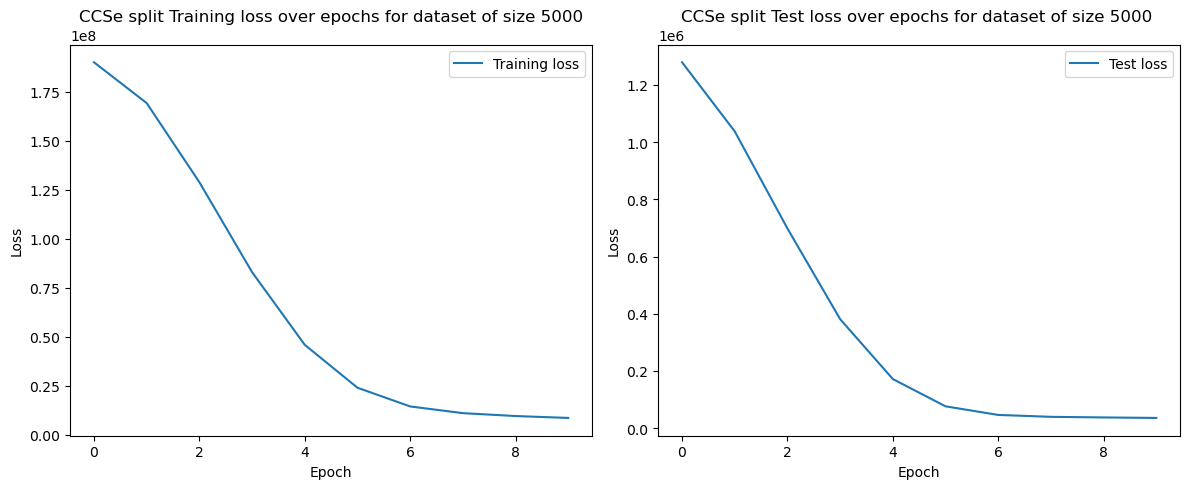

In [14]:
model_ICSe,criterion_ICSe = training_models(fingerprints_train_ICSe, fingerprints_test_ICSe, target_train_ICSe, target_test_ICSe, 'ICSe split')
model_RAND,criterion_RAND = training_models(fingerprints_train_RAND, fingerprints_test_RAND, target_train_RAND, target_test_RAND, 'random split')
model_CCSe,criterion_CCSe = training_models(fingerprints_train_CCSe, fingerprints_test_CCSe, target_train_CCSe, target_test_CCSe, 'CCSe split')

### Evaluation & prediction on test set
This function evaluates the trained neural network model by plotting the predicted outputs against the target values, calculating additional evaluation metrics(`mean_squared_error` , `mean_absolute_error` and `r2_score`), and returning the evaluation results as a dictionary.

In [15]:
def evaluation(target_train, fingerprints_test, target_test, title, ax, color, dataset, model, criterion):
    """
    Evaluate the performance of a trained model on test data and calculate various evaluation metrics.

    @args:
    ------
    target_train : torch.Tensor
        Training target tensor.
    fingerprints_test : torch.Tensor
        Test fingerprints tensor.
    target_test : torch.Tensor
        Test target tensor.
    title : str
        Title for the evaluation plot.
    ax : matplotlib.axes.Axes
        Axes object to plot the evaluation.
    color : str
        Color for the scatter plot.
    dataset : list
        List of data points in the dataset.
    model : FNN
        Trained FNN model.
    criterion : nn.Module
        Loss function used for training.

    @return:
    --------
    dict
        Dictionary containing evaluation metrics:
        - 'Split method': Title of the split method.
        - 'MSE': Normalized mean squared error.
        - 'MAE': Normalized mean absolute error.
        - 'R2': R-squared score.
        - 'Test_Size': Test data size as a fraction of the dataset.
    """
    with torch.no_grad():
        model.eval()
        test_outputs = model(fingerprints_test)
        test_loss = criterion(test_outputs, target_test)
    predictions = test_outputs.numpy()

    # Convert target_test to a NumPy array
    target_test = np.array(target_test)

    # Calculate additional evaluation metrics
    mse = mean_squared_error(target_test.flatten(), predictions.flatten())
    mae = mean_absolute_error(target_test.flatten(), predictions.flatten())
    r2 = r2_score(target_test.flatten(), predictions.flatten())

    # Normalize error metrics
    target_std = target_test.std()
    mse_normalized = mse / target_std
    mae_normalized = mae / target_std

    test_size = round(len(fingerprints_test) / len(dataset), 2)
    
    ax.scatter(predictions.flatten(), target_test.flatten(), s=3, alpha=0.5, color=color)
    ax.set_xlabel('Prediction')
    ax.set_ylabel('Truth')
    ax.grid(True, linestyle=':', linewidth=0.5)

    # Display additional evaluation metrics
    ax.text(0.03, 0.97, f'MSE: {mse_normalized:.4f}', transform=ax.transAxes)
    ax.text(0.03, 0.93, f'MAE: {mae_normalized:.4f}', transform=ax.transAxes)
    ax.text(0.03, 0.89, f'R2: {r2:.4f}', transform=ax.transAxes)
    ax.set_title(f'{title} split method over {len(dataset)} data points', loc='center')

    # Remove the legend warning
    ax.legend([])

    # Return evaluation metrics as a dictionary
    return {
        'Split method': title,
        'MSE': mse_normalized,
        'MAE': mae_normalized,
        'R2': r2,
        'Test_Size': test_size
    }

This code generates evaluation plots, saves evaluation results in text and tsv formats, and displays the plots, providing a comprehensive overview of the evaluation metrics for the neural network model on different size of datasets.

Table: Evaluation Results for FNN model with 10 epochs over qm9_5000

╒════════════════╤═════════╤══════════╤══════════╤═════════════╕
│ Split method   │     MSE │      MAE │       R2 │   Test_Size │
╞════════════════╪═════════╪══════════╪══════════╪═════════════╡
│ CCSe           │ 181.162 │ 0.742335 │ 0.083516 │         0.2 │
├────────────────┼─────────┼──────────┼──────────┼─────────────┤
│ RAND           │ 237.96  │ 0.661576 │ 0.154274 │         0.2 │
├────────────────┼─────────┼──────────┼──────────┼─────────────┤
│ ICSe           │ 227.2   │ 0.648123 │ 0.198567 │         0.2 │
╘════════════════╧═════════╧══════════╧══════════╧═════════════╛


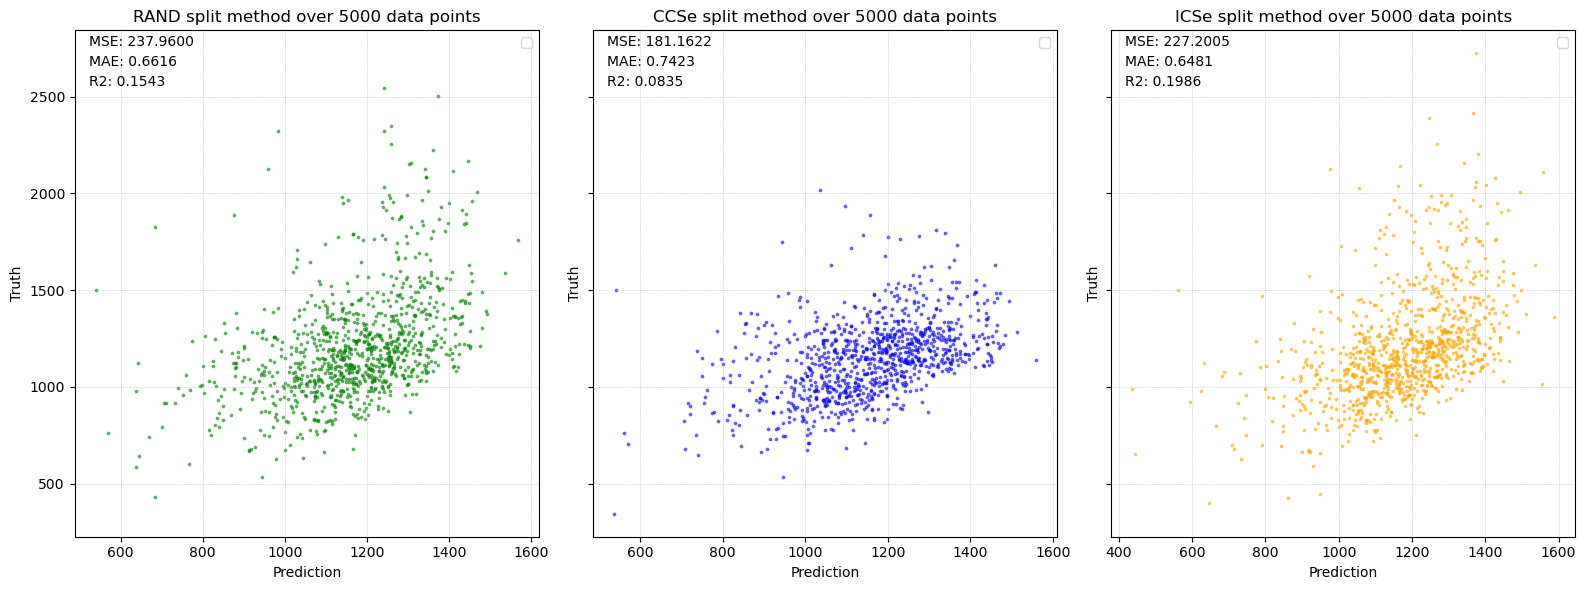

In [16]:
# Control number of plots
fig, axs = plt.subplots(1, 3, figsize=(16, 6), sharey=True)

colors = ['green', 'blue', 'orange', 'red', 'purple', 'brown']

# Call evaluation for each dataset
results = []
results.append(evaluation(target_train_CCSe,fingerprints_test_CCSe, target_test_CCSe, "CCSe", axs[1], colors[1], data, model_CCSe, criterion_CCSe))
results.append(evaluation(target_train_RAND,fingerprints_test_RAND, target_test_RAND, "RAND", axs[0], colors[0], data, model_RAND, criterion_RAND))
results.append(evaluation(target_train_ICSe,fingerprints_test_ICSe, target_test_ICSe, "ICSe", axs[2], colors[2], data, model_ICSe, criterion_ICSe))

# Print results as a table
source_data=str(DATA).split('/')[-1].split('.')[0]
table = tabulate(results, headers='keys', tablefmt='fancy_grid')
print(f'Table: Evaluation Results for FNN model with {num_epochs} epochs over {source_data}\n')
print(table)
'''
# Save the table as a text file
with open(f'evaluation_results_FNN{num_epochs}.txt', 'a') as file:
    file.write(f"\n\nTable: Evaluation Results for FNN model with {num_epochs} epochs over {source_data}\n")
    file.write(table)
# Save the table as a tsv file
with open(f'evaluation_results_FNN{num_epochs}.tsv', 'a', newline='') as file:
    writer = csv.writer(file, delimiter='\t')
    writer.writerow(['Split method', 'MSE', 'MAE','R2', 'data_size'])
    for result in results:
        writer.writerow([result['Split method'], result['MSE'], result['MAE'],result['R2'],len(data)])
'''
# Save the plots
for result, ax in zip(results, axs):
    title = result['Split method']
    plt.savefig(f'results_{len(data)}.png')

# Display the plots
plt.tight_layout()
plt.show()

### Evaluation of models by increasing the size of dataset
This code reads the evaluation results, creates plots for MSE and MAE, saves the plots as PNG files, and displays the plots, providing visual representations of the performance of the FNN model with a specified number of epochs across different dataset sizes.

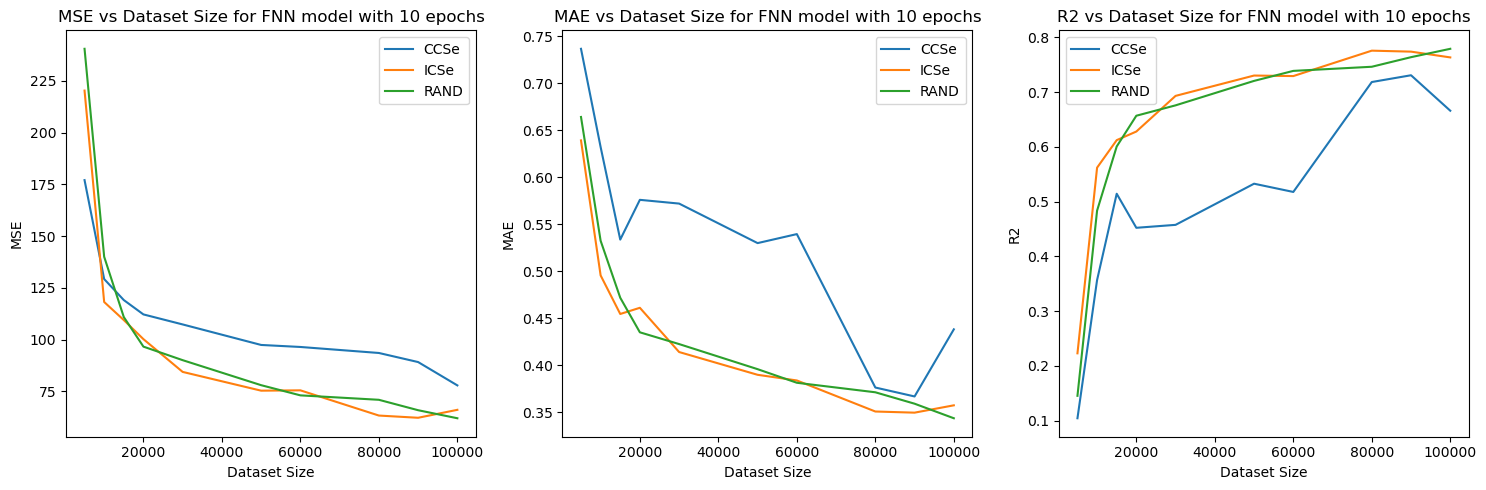

In [17]:
#data=pd.read_csv('evaluation_results_FNN10.tsv',sep='\t',)
#data=data[~data['Split method'].str.contains('Split')]
#data.to_csv('proccessed_evaluation_results_FNN10.tsv',sep='\t',index=False)

data = pd.read_csv('proccessed_evaluation_results_FNN10.tsv', delimiter='\t')

# Group the data by the method
grouped_data = data.groupby('Split method')

# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plotting MSE
ax = axes[0]
for name, group in grouped_data:
    ax.plot(group['data_size'], group['MSE'], label=name)
ax.set_xlabel('Dataset Size')
ax.set_ylabel('MSE')
ax.set_title(f'MSE vs Dataset Size for FNN model with {num_epochs} epochs')
ax.legend()

# Plotting MAE
ax = axes[1]
for name, group in grouped_data:
    ax.plot(group['data_size'], group['MAE'], label=name)
ax.set_xlabel('Dataset Size')
ax.set_ylabel('MAE')
ax.set_title(f'MAE vs Dataset Size for FNN model with {num_epochs} epochs')
ax.legend()

# Plotting R2
ax = axes[2]
for name, group in grouped_data:
    ax.plot(group['data_size'], group['R2'], label=name)
ax.set_xlabel('Dataset Size')
ax.set_ylabel('R2')
ax.set_title(f'R2 vs Dataset Size for FNN model with {num_epochs} epochs')
ax.legend()

# Adjust the layout and spacing between subplots
plt.tight_layout()

# Save the plots as PNG
plt.savefig('evaluation_plots.png')

# Show the plots
plt.show()


### Discussion 
The plots shows that the different split methods have different effects on the MSE, MAE, and R2 scores as the data size increases. The CCSe consistently shows higher MSE and MAE scores and lower R2 scores compared to RAND and ICSe, indicating that model suffers the most. This suggests that CCSe is a  suitable method to split the data because it minemize the data leakage between traning and test set for this particular problem or dataset. Both RAND and ICSe split methods show improved model performance (lower MSE and MAE) and better model fit (higher R2) as the data size increases. This indicates that both methods benefit from larger data sizes and have similar effectiveness in reducing errors and capturing the patterns in the data.It appears that for data sizes lower than 20,000, the ICSe split method consistently outperforms the RAND method. This suggests that ICSe is more effective in capturing patterns and reducing test error in smaller datasets.
However, for data sizes larger than 20,000, it becomes harder to determine which split method is better between ICSe and RAND. The performance of both methods becomes more comparable, and the difference between them may not be statistically significant. This suggests that as the data size increases, the effectiveness of both split methods converges, and the choice between them becomes less influential.
The MSE, MAE,  tend to decrease as the data size increases. This is to be expected, as the larger the data set, the more information there is for the model to learn from. 

**The difference in performance between the different split methods tends to decrease as the data size increases**. This suggests that the choice of split method becomes less important as the data set becomes larger.
Results for 20 epoch was in faver of ICSe method as the size od dataset increased.

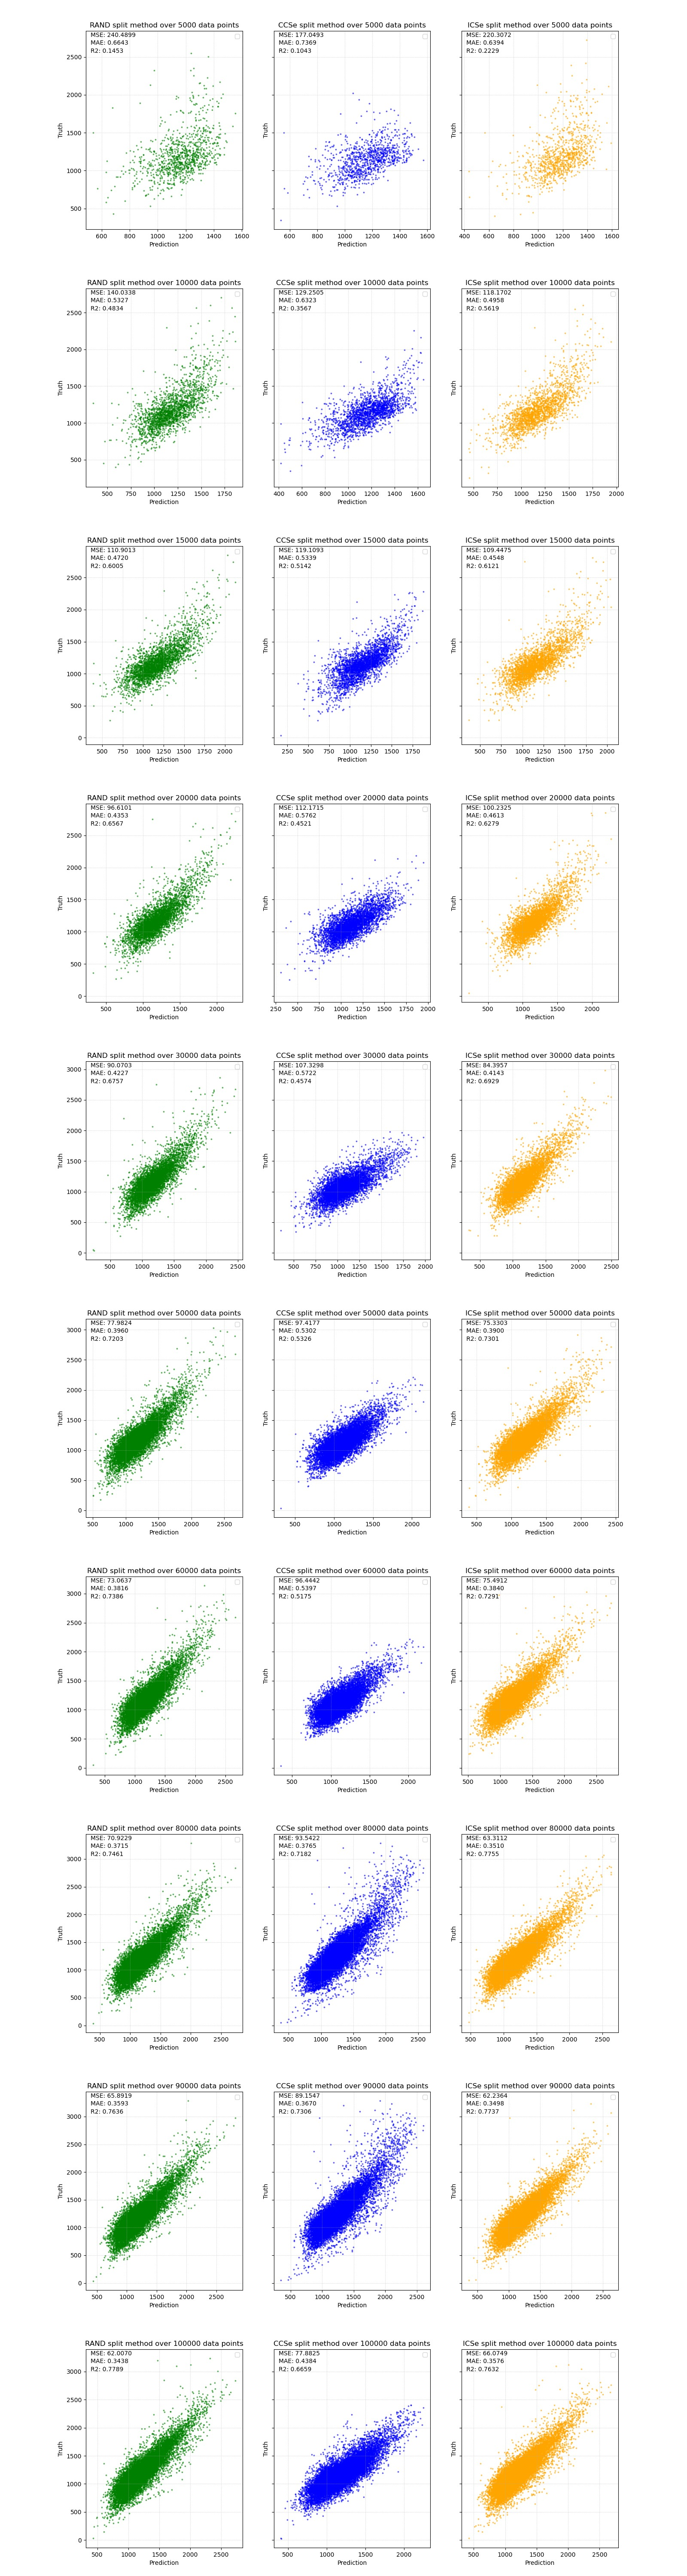

### Conclusion
Indeed, data leakage is a relative concept that depends on the characteristics of the data and the relationship between the target feature and the response variable. The impact of data leakage can vary based on several factors. First, the nature of the data plays a crucial role. If the data contains explicit or implicit information about the target feature that is not supposed to be available during prediction, it can introduce leakage. To prevent data leakage, it is important to carefully examine the data and the problem at hand. Feature engineering and preprocessing techniques can help identify and address potential sources of leakage. It is crucial to ensure that the model is trained only on information that would be available at the time of making predictions. In conclusion, the occurrence and impact of data leakage depend on the specific characteristics of the data and the relationship between the target feature and the response variable. By understanding these factors and employing appropriate measures, such as feature selection and clustring, one can mitigate the risks of data leakage and develop more accurate and reliable predictive models.

### Quiz
1. What is data leakage?
2. What is the definition Molecular Scaffold
3. What is the diferrent between Scaffold and Generic Scaffold?
4. What challenges or limitations can arise when using scaffold-based data splitting to reduce data leakage?